### Ali Raza
### 20I-0782
### Assignment 5

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Calculates Euclidean distance between points
def euclidean_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

# Assigns each pixel to the closest centroid
def assign_to_clusters(X, centroids):
    distances = np.array([euclidean_distance(X, c) for c in centroids])
    return np.argmin(distances)

# Driver function for K-Means
def kmeans(X, k, max_iters=100):
    
    m, n = X.shape 
    centroids = X[np.random.choice(m, k, replace=False)]  # Randomly initialize centroids


    # Add a convergence threshold
    convergence_threshold = 1e-4    

    for _ in range(max_iters):
        old_centroids = centroids.copy()

        # Assign each pixel to the closest centroid
        labels = np.array([assign_to_clusters(x, centroids) for x in X])

        # Update centroids based on the mean of assigned examples
        for i in range(k):
            centroids[i] = np.mean(X[labels == i], axis=0)

        # Check for convergence
        if np.linalg.norm(old_centroids - centroids) < convergence_threshold:
            break

    return labels, centroids


#
def replace_with_mean(image, centroids, labels):
    new_image = np.zeros_like(image)
    
    # Reshape labels to image shape
    labels_reshaped = labels.reshape(image.shape[:2])

    # replace pixels with the mean according to assigned label 
    for i in range(len(centroids)):
        new_image[labels_reshaped == i] = centroids[i]
    
    return new_image.astype(np.uint8)


# Plots the original and segmented images side by side
def plot_images(original,segmented, k):

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(segmented)
    plt.title(f'Segmented Image (K={k})')

    plt.show()


# Prints the means of each cluster
def print_means(clusters):

    for i in range(len(clusters)):
        print(f"Cluster {i+1}:", clusters[i] )






In [2]:
# Load image
image = Image.open('sample.jpg')

# Resize the image for faster processing (200x200)
resized_image = image.resize((200, 200))

# Convert resized image to NumPy array
rgb_image = np.array(resized_image)

# Reshape image to a 2D array
pixels = rgb_image.reshape((-1, 3))



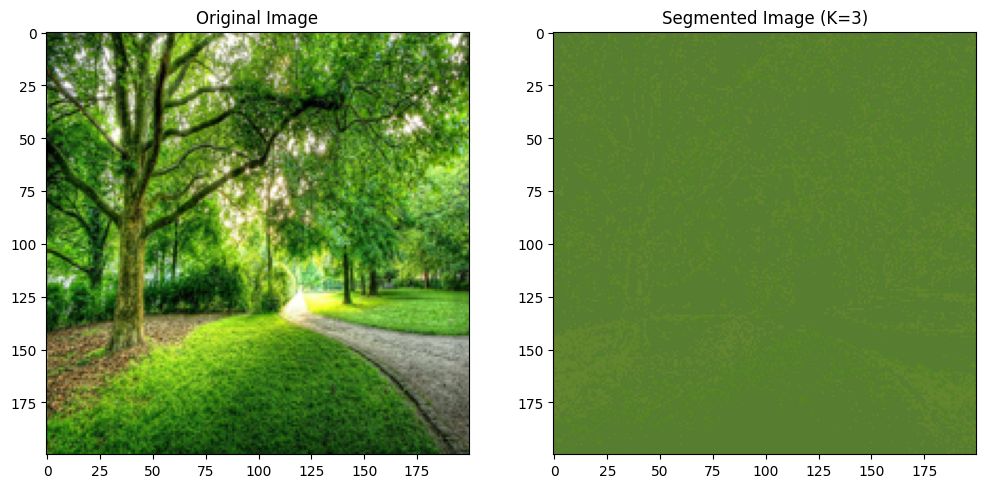

Cluster 1: [ 86 125  48]
Cluster 2: [ 86 133  38]
Cluster 3: [100 133  47]


In [3]:
# Perform K-Means clustering
k = 3
labels, centroids = kmeans(pixels, k)

# Replace pixels with the closest cluster mean
segmented_image = replace_with_mean(rgb_image, centroids, labels)

plot_images(rgb_image, segmented_image, k)

print_means(centroids)

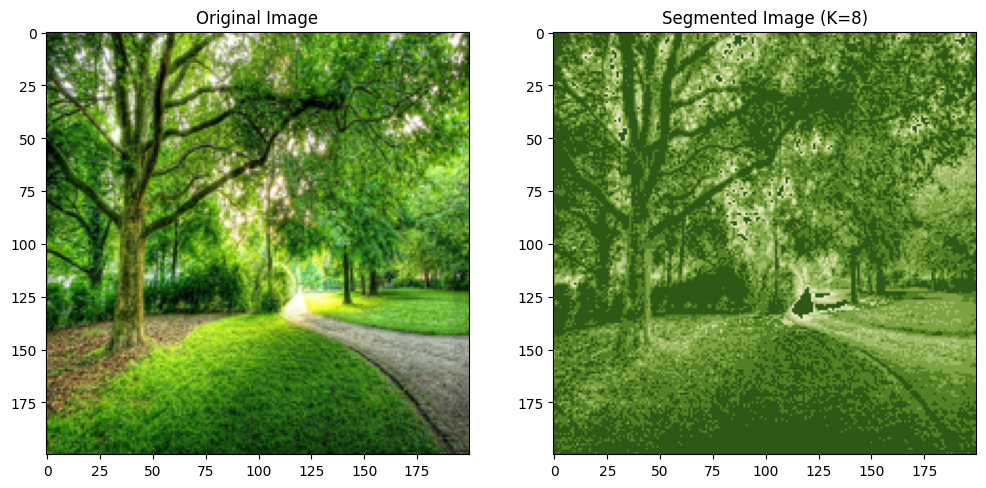

Cluster 1: [ 84 128  37]
Cluster 2: [124 162  65]
Cluster 3: [233 236 194]
Cluster 4: [191 207 138]
Cluster 5: [227 231 187]
Cluster 6: [211 221 162]
Cluster 7: [46 88 21]
Cluster 8: [159 187 105]


In [4]:
# Perform K-Means clustering
k = 8
labels, centroids = kmeans(pixels, k)

# Replace pixels with the closest cluster mean
segmented_image = replace_with_mean(rgb_image, centroids, labels)

plot_images(rgb_image, segmented_image, k)

print_means(centroids)

## Results
As we can see, when using k=3, the segmented image is very difficult to makeout. This is especially more observable with this specific image where there are various shades of the same color group (i.e. green). When we use k=8, the image is more clear and can be interpreted as an image of a forrest or park since the tree is identifiable. Considering that the original image is rezised to a 200x200 pixels, when we run the algorithm with k=3 the time taken is roughly 2 mins each time. Wheresas, with k=8 the time taken is double. Overall, since the point of this type segmentation is to process the image into a less computation heavy version for further processing. It is important that the objects in the image are not lost. Thus, the results prove to be better in this specific case. 